# Import necessary Libraies

In [2]:
!pip install ultralytics
!pip install roboflow

from ultralytics import YOLO
from IPython.display import Image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 2.6 MB/s eta 0:00:00


# Download Dataset

In [18]:
# Dataset: https://universe.roboflow.com/sign-recognintion/sign-recoginition/dataset/1/images/033676d53cf009736cd4d5febc17f4fb

from roboflow import Roboflow

rf = Roboflow(api_key="ci9EBLQFtbroDou68Nn0")
project = rf.workspace("sign-recognintion").project("sign-recoginition")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


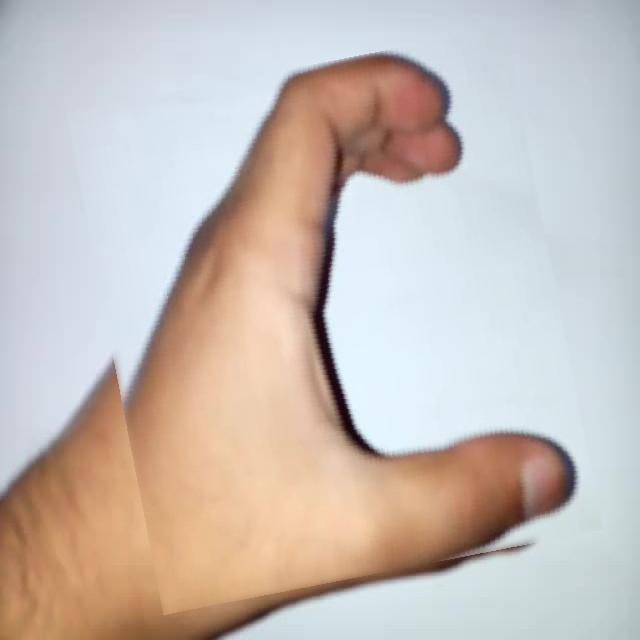

In [4]:
# plot sample image
Image('/kaggle/working/Sign-recoginition-1/train/images/001_jpg.rf.35d56fd3557ab1262f0a4686c27d198c.jpg', width=500)

In [6]:
# Edit the yaml file  to locate my data path which is  under /kaggle/working/Facial-Emotion-Dataset--3/data.yaml
import yaml

# Path to your YAML file
yaml_file_path = "/kaggle/working/Sign-recoginition-1/data.yaml"

# Read the YAML file
with open(yaml_file_path, 'r') as file:
    data = yaml.safe_load(file)

# Update the paths
data['train'] = '/kaggle/working/Sign-recoginition-1/train/images'
data['val'] = '/kaggle/working/Sign-recoginition-1/valid/images'
data['test'] = '/kaggle/working/Sign-recoginition-1/test/images'

# Save the updated YAML file
with open(yaml_file_path, 'w') as file:
    yaml.safe_dump(data, file)

print("YAML file updated successfully!")

YAML file updated successfully!


# Model Training

In [8]:
!yolo task=detect mode=train data="/kaggle/working/Sign-recoginition-1/data.yaml" model="yolo11n.pt" epochs=50 imgsz=640

100%|██████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 73.6MB/s]
Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/Sign-recoginition-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fr

## Examine Training Results

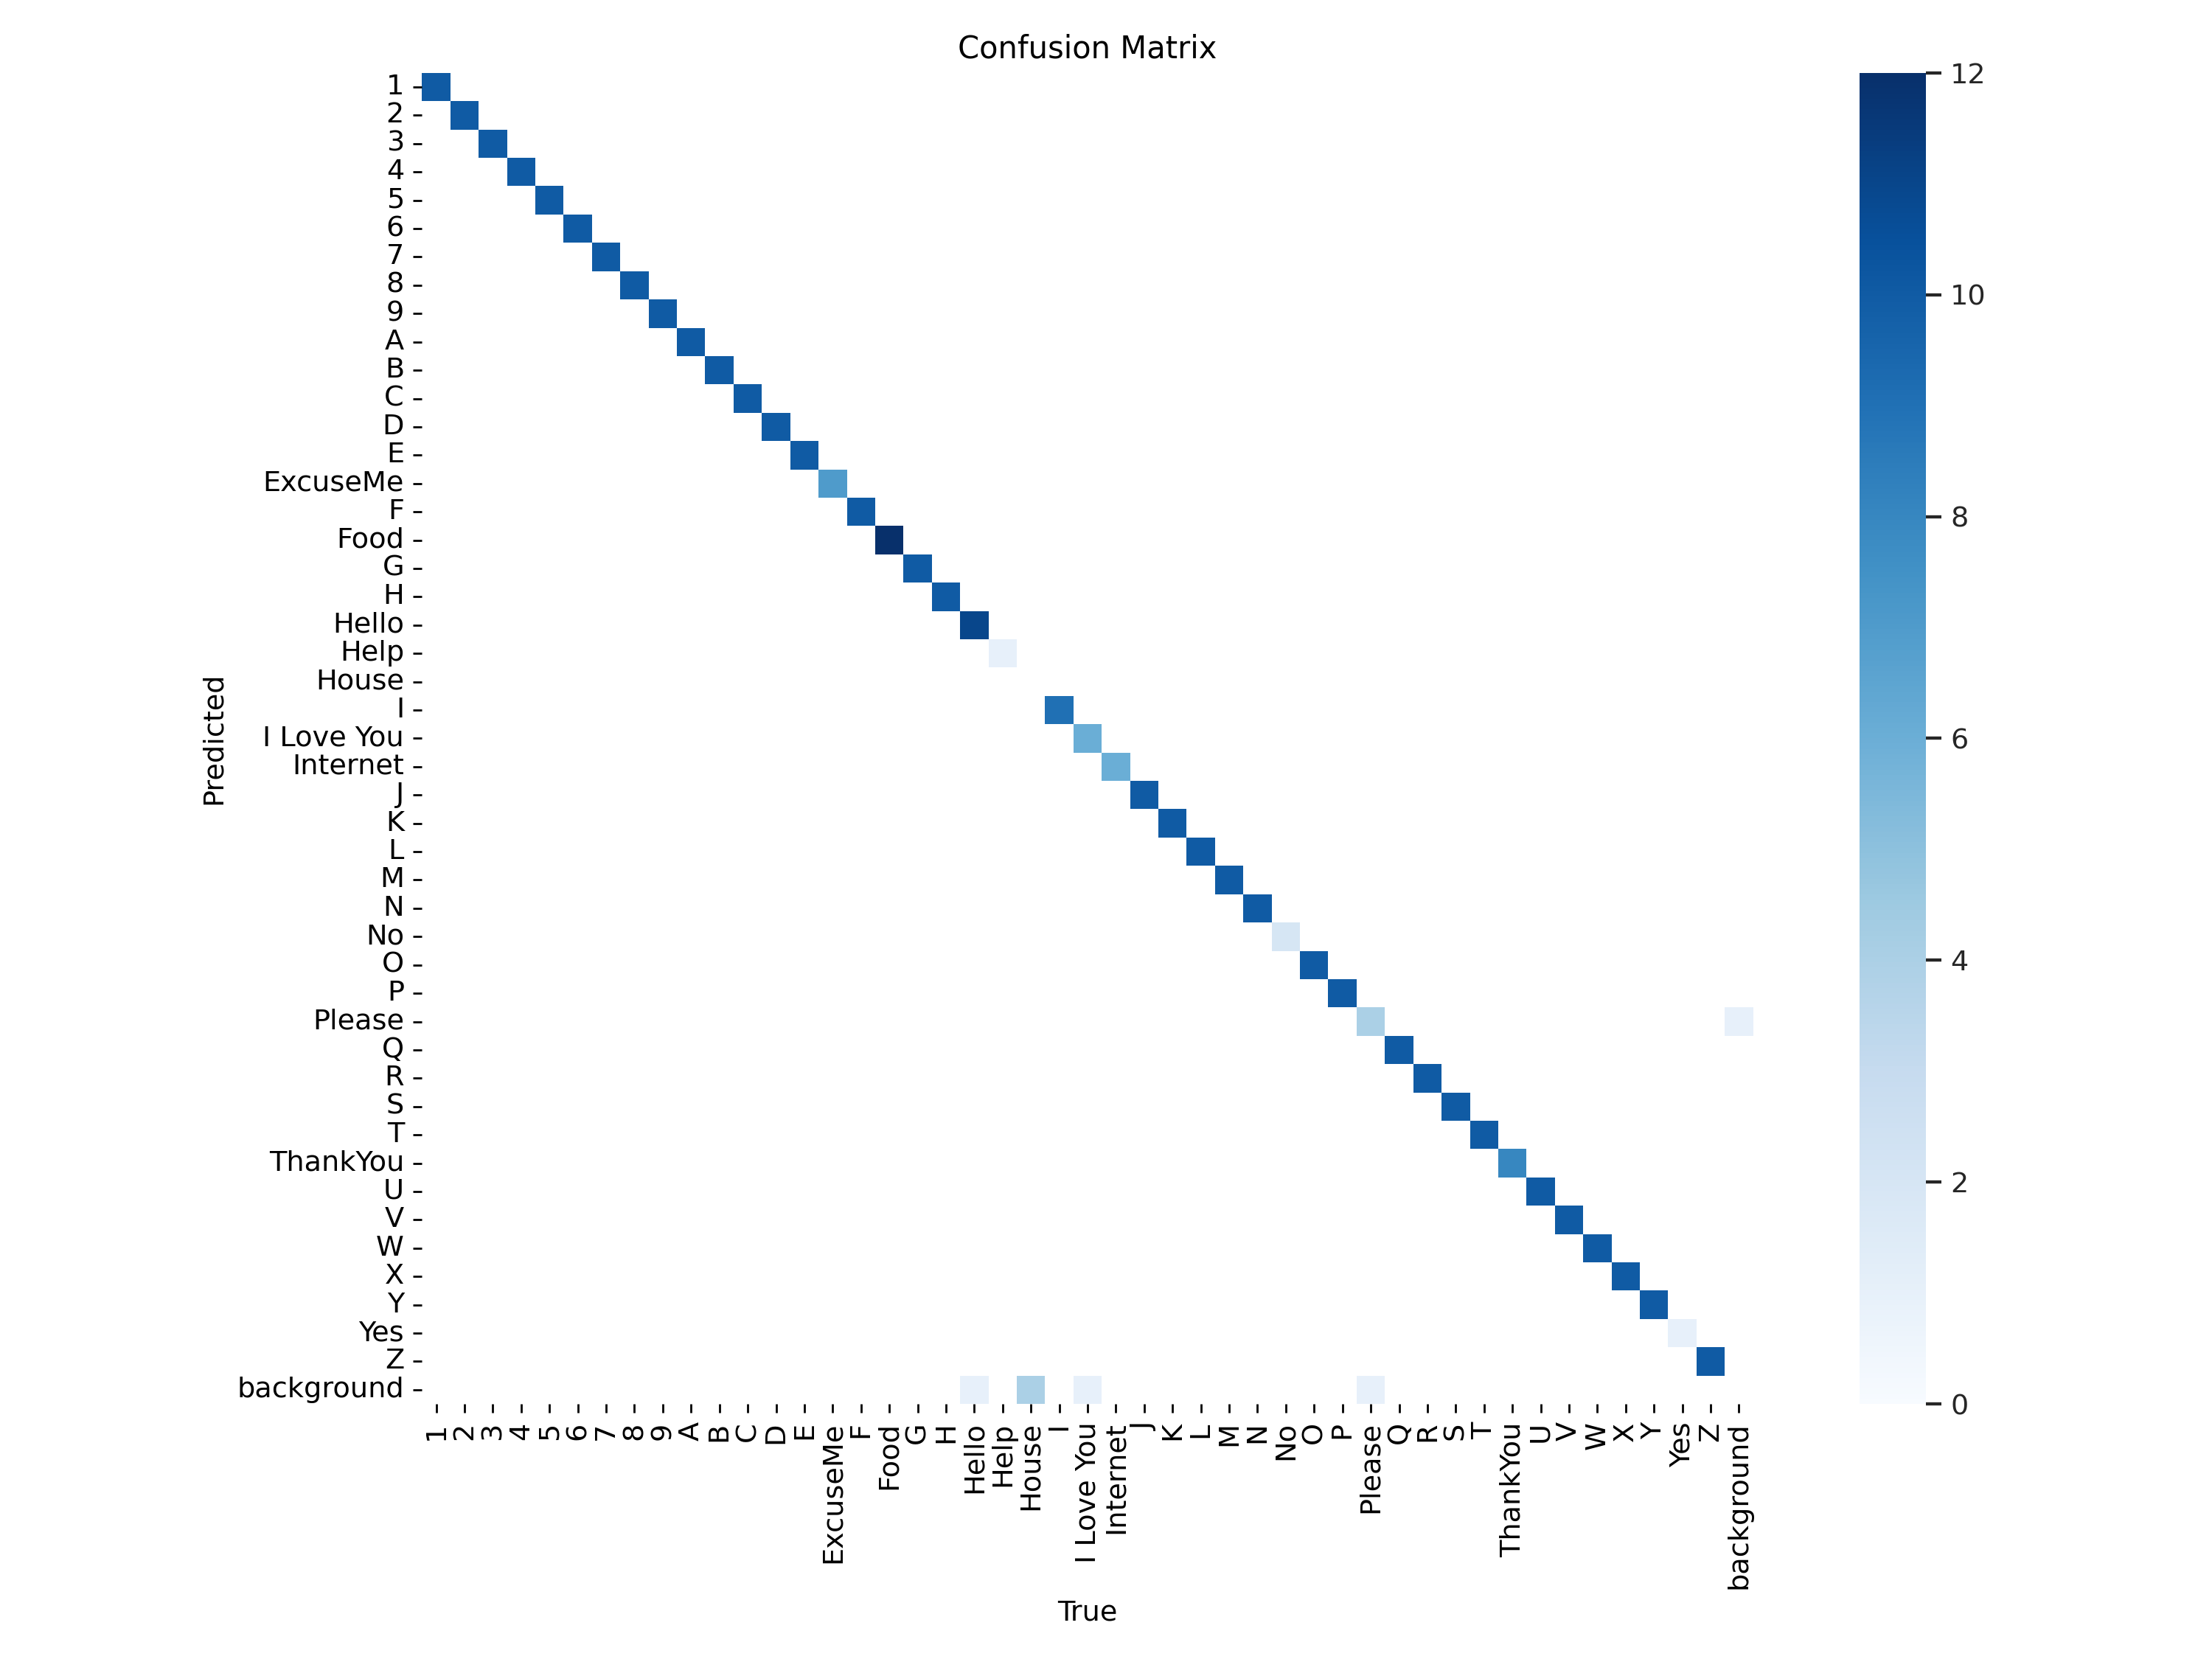

In [9]:
Image('/kaggle/working/runs/detect/train/confusion_matrix.png', width=600)

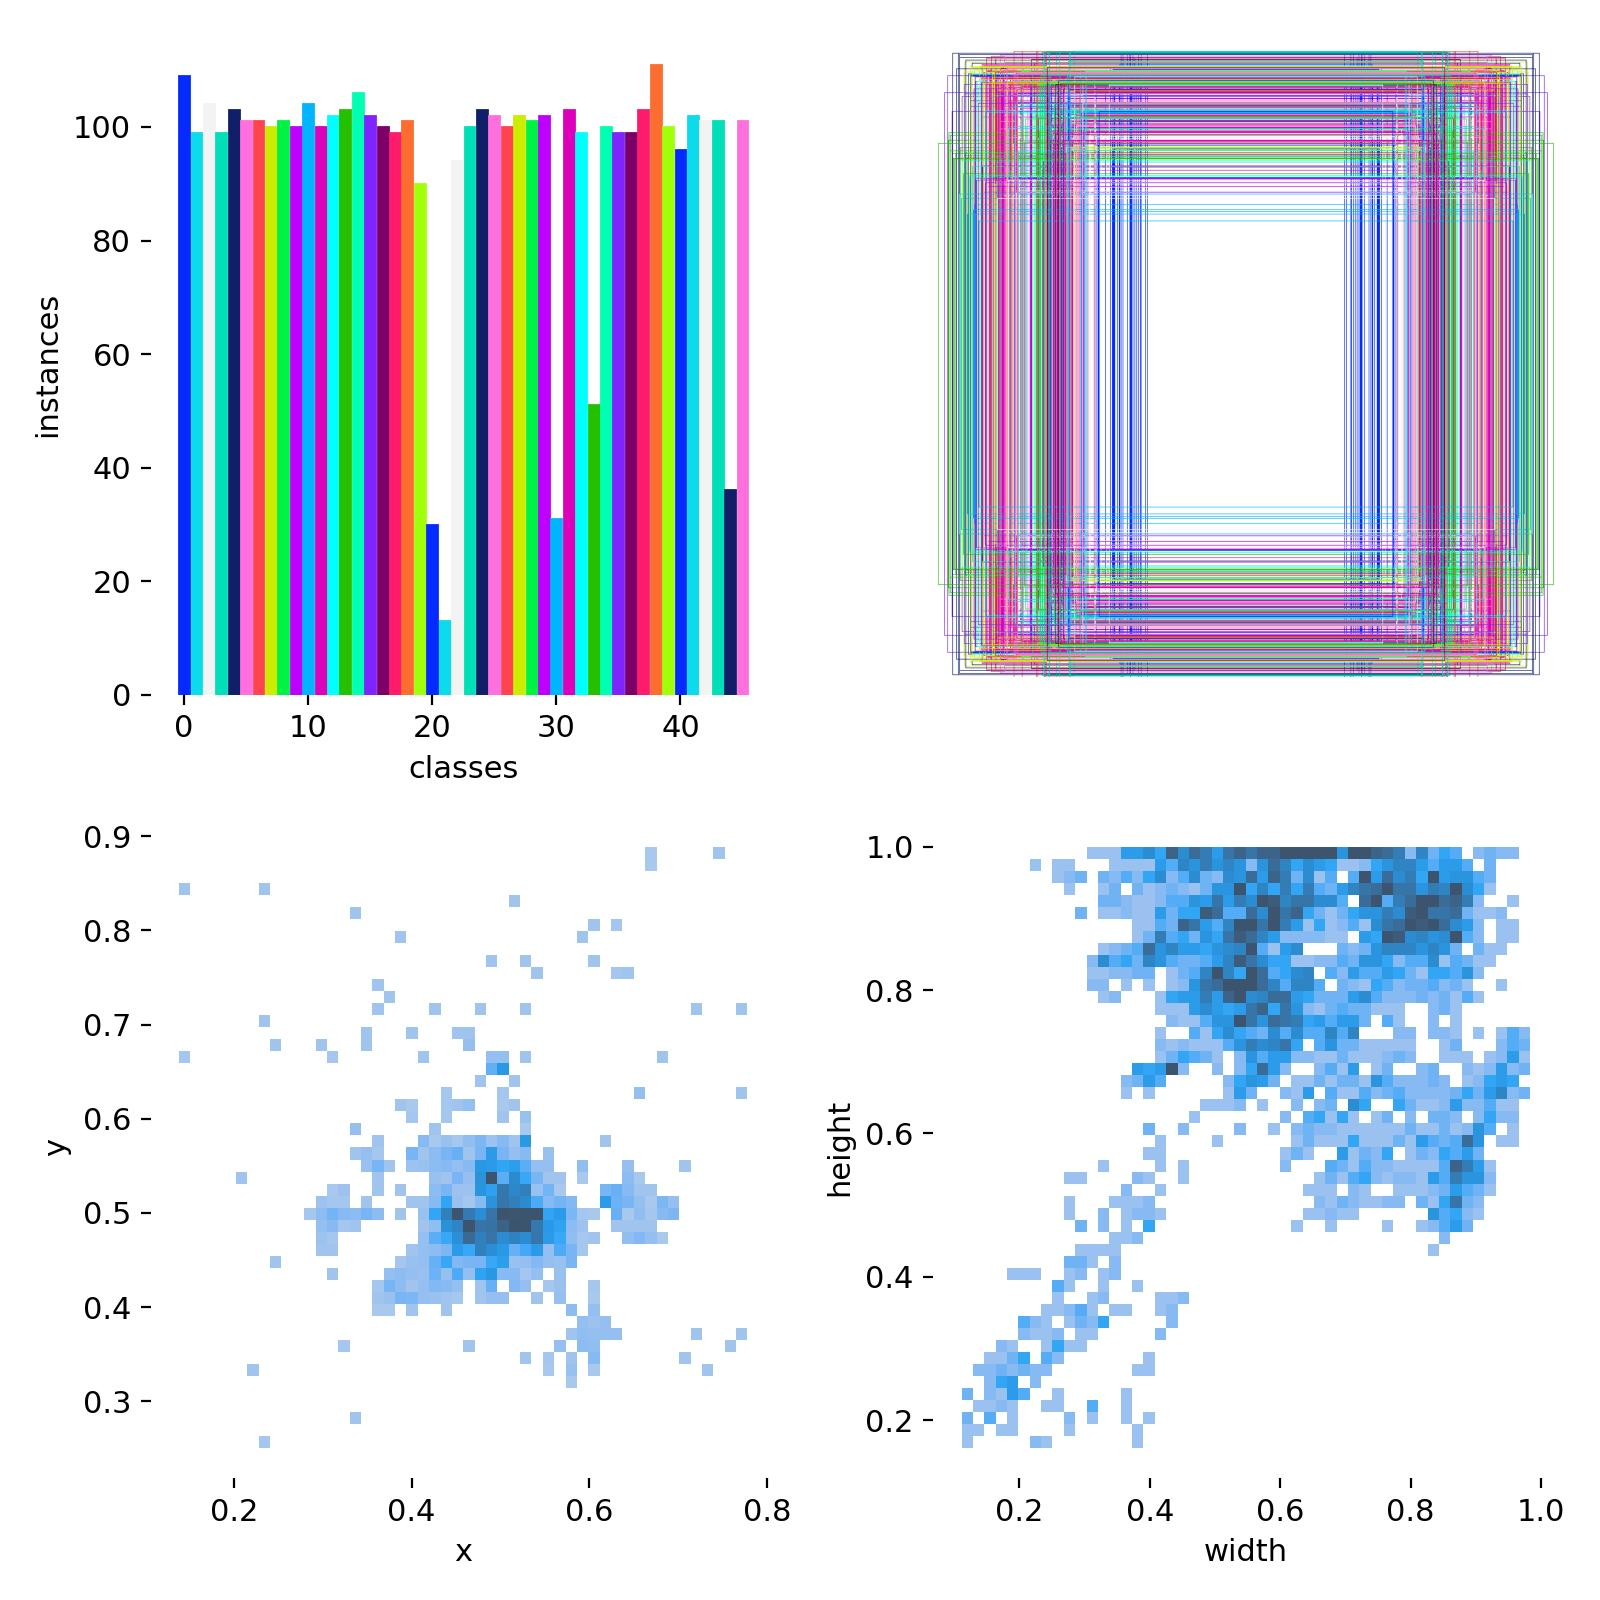

In [10]:
Image("/kaggle/working/runs/detect/train/labels.jpg", width=600)

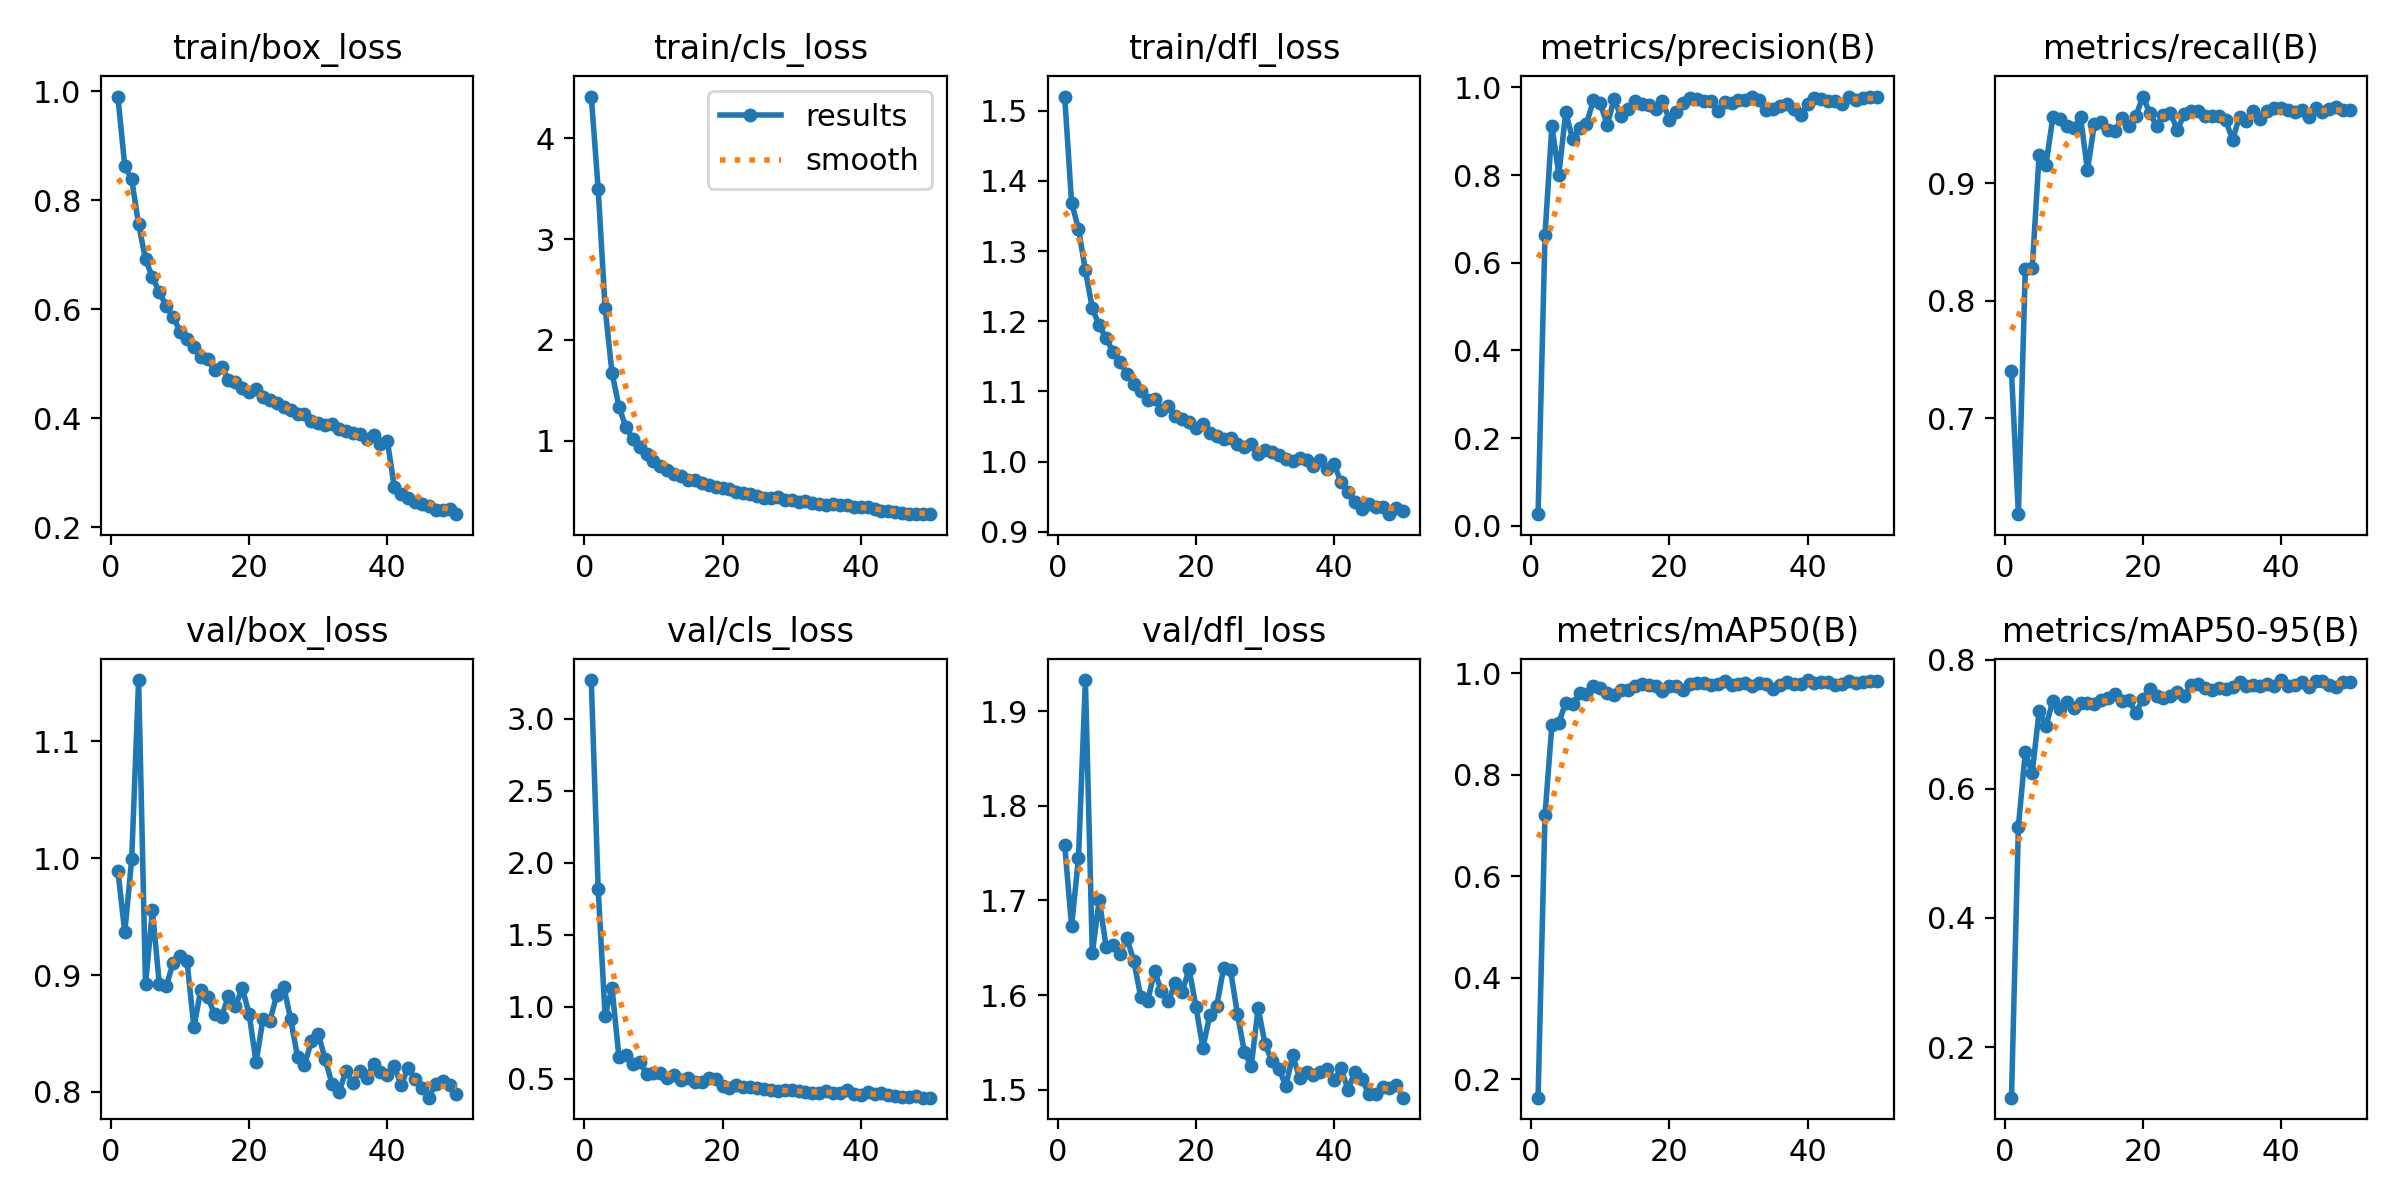

In [11]:
Image("/kaggle/working/runs/detect/train/results.png", width=600)

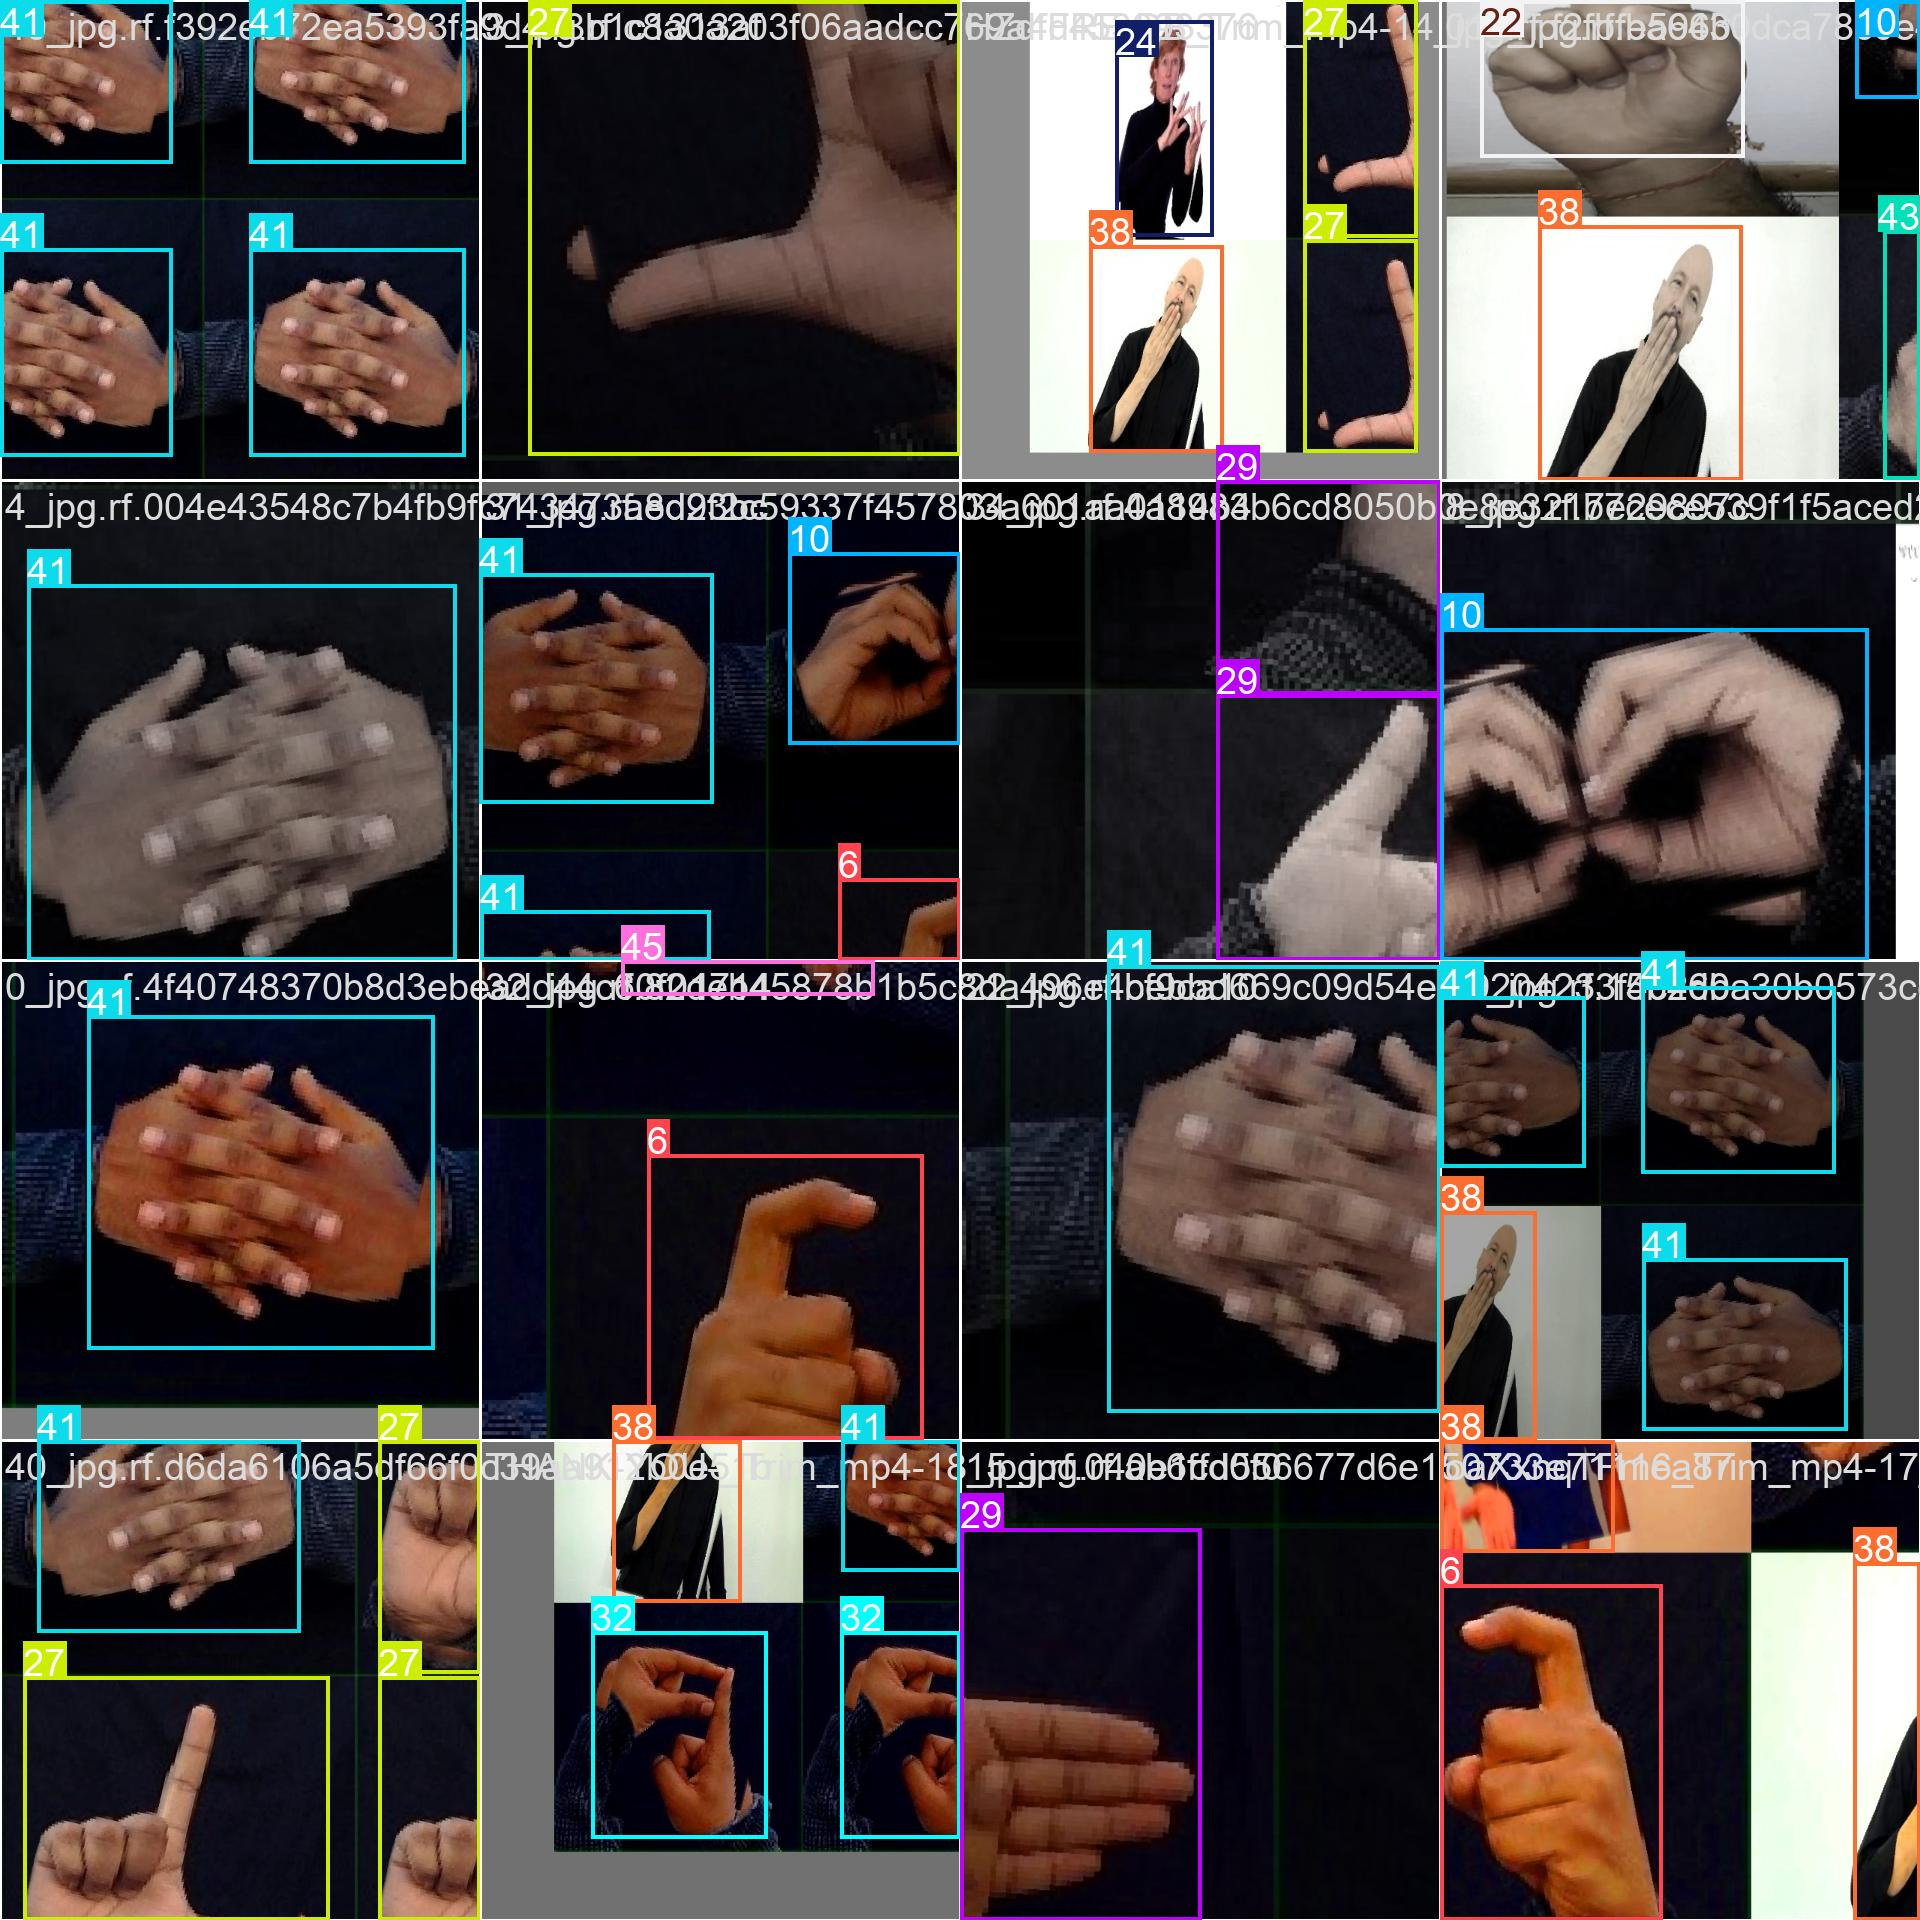

In [12]:
Image("/kaggle/working/runs/detect/train/train_batch0.jpg", width=600)

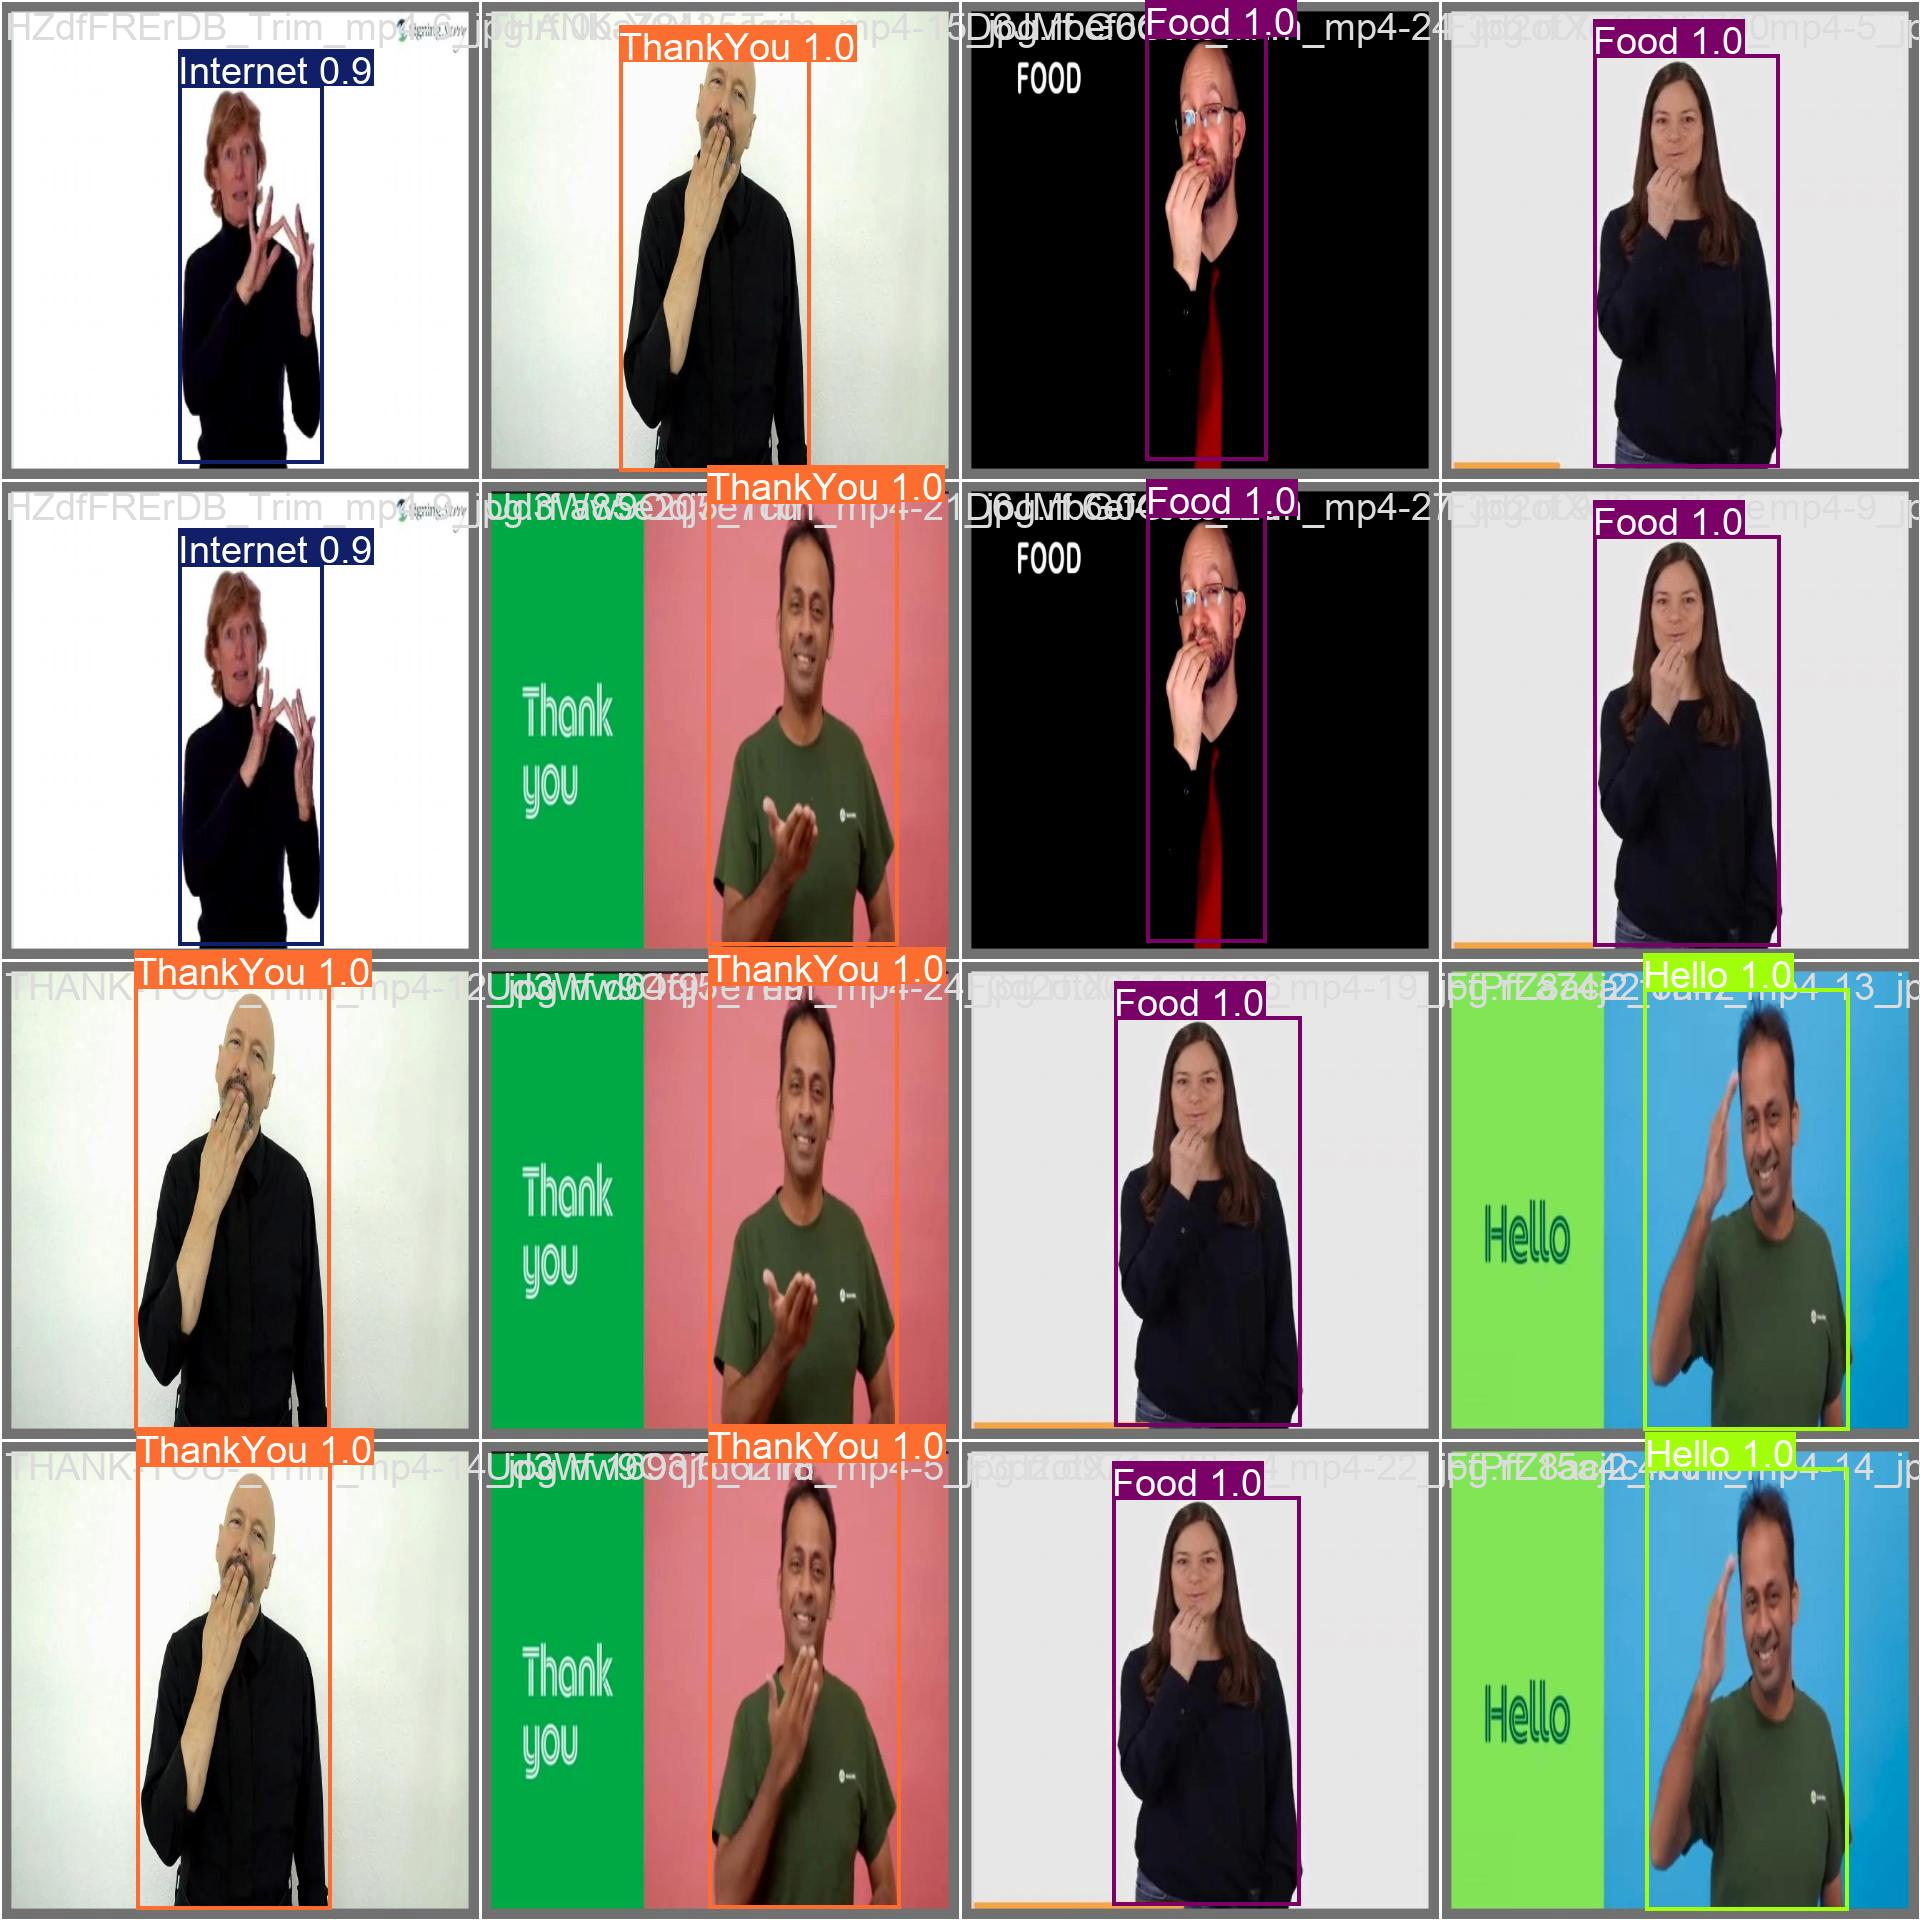

In [13]:
Image("/kaggle/working/runs/detect/train/val_batch0_pred.jpg", width=600)

# Perform prediction

In [15]:
!yolo task=detect mode=predict model="/kaggle/working/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 238 layers, 2,591,122 parameters, 0 gradients, 6.4 GFLOPs

image 1/222 /kaggle/working/Sign-recoginition-1/test/images/006_jpg.rf.362877a451de39815ba8112422df0097.jpg: 640x640 1 I, 10.1ms
image 2/222 /kaggle/working/Sign-recoginition-1/test/images/011_jpg.rf.4eec364b2830a716efd5212822653abb.jpg: 640x640 1 O, 8.8ms
image 3/222 /kaggle/working/Sign-recoginition-1/test/images/012_jpg.rf.14b486c6ae715d6d8c15d83049a2c6da.jpg: 640x640 1 V, 9.9ms
image 4/222 /kaggle/working/Sign-recoginition-1/test/images/013_jpg.rf.a4db748ae870f12b42939cc2fa9faf0d.jpg: 640x640 1 V, 8.6ms
image 5/222 /kaggle/working/Sign-recoginition-1/test/images/014_jpg.rf.66a9ce59c863c742334f64ae11a3c418.jpg: 640x640 1 I, 8.6ms
image 6/222 /kaggle/working/Sign-recoginition-1/test/images/014_jpg.rf.ce5eba340b1179cf15d878a2d48529fe.jpg: 640x640 1 O, 8.5ms
image 7/222 /kaggle/working/Sign-recoginition-1/test/images

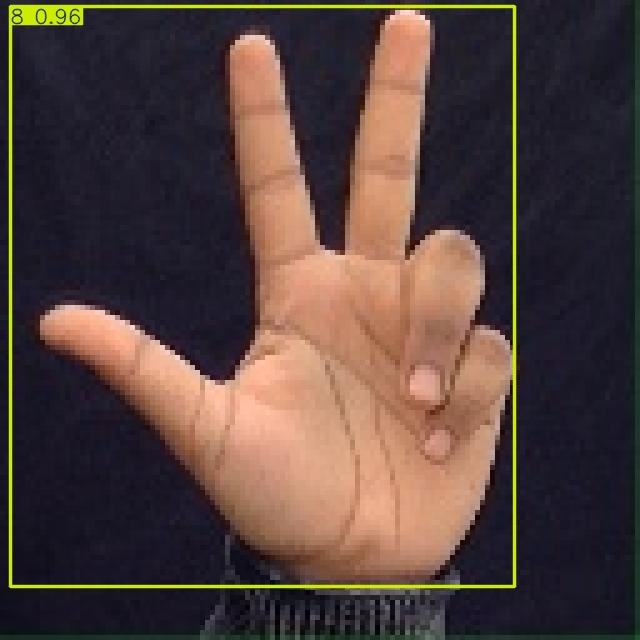

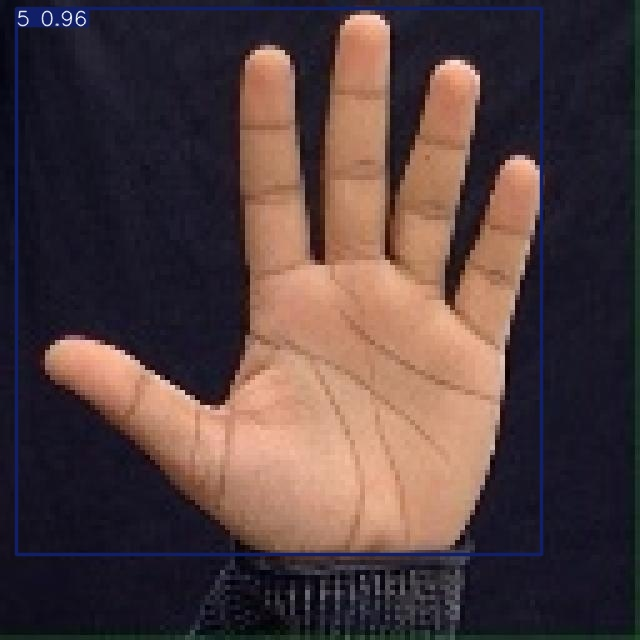

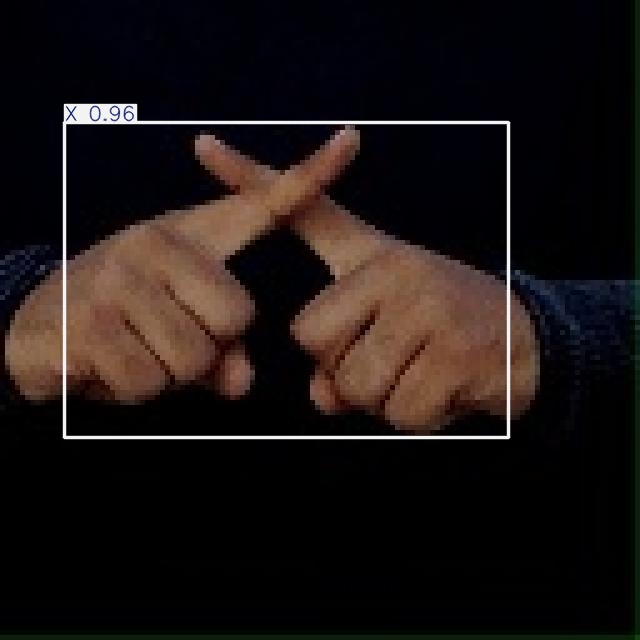

In [16]:
import glob
import os
from IPython.display import Image as IPyImage,display

latest_folder = max(glob.glob('/kaggle/working/runs/detect/predict*/'), key=os.path.getmtime)

for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [17]:
# Install /kaggle/working/runs/detect/train/weights/best.pt to local and test with real time cam